In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('software_usage.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

NameError: name 'mpl' is not defined

In [ ]:
countRunsPerDate = df.groupby('software')['date'].count().filter(like='elastic')
countRunsPerDate.head()

software
elasticsearch    108
Name: date, dtype: int64

In [ ]:
subsetElasticSearch = df[df['software'].str.contains('python')].sort_values(by='date', ascending=True)
subsetElasticSearch.head(20)

,date,software,version,usage_minutes
426,2024-06-02,python,3.3.1,347
885,2024-06-05,python,3.5.6,41
179,2024-06-06,python,3.0.7,115
436,2024-06-11,python,3.1.1,144
919,2024-06-12,python,3.8.7,474
740,2024-06-12,python,3.0.8,49
648,2024-06-12,python,3.3.3,438
108,2024-06-13,python,3.0.3,291
412,2024-06-24,python,3.4.7,208
223,2024-07-02,python,3.7.3,239


In [ ]:
from pandas.tseries.offsets import DateOffset

elasticsearch_count_executions = subsetElasticSearch.groupby('date')['software'].count()

# Assume 'date' is already a datetime column
six_months_ago = pd.Timestamp.today() - DateOffset(months=6)

# Filter to only rows from the last 6 months
recent_subset = subsetElasticSearch[subsetElasticSearch['date'] > six_months_ago]

# Group and count executions
elasticsearch_count_executions = recent_subset.groupby('date')['software'].count()

elasticsearch_count_executions.head(40)


date
2024-12-04    1
2024-12-06    1
2024-12-09    1
2024-12-13    1
2024-12-14    1
2024-12-26    1
2025-01-04    1
2025-01-07    1
2025-01-19    1
2025-01-21    2
2025-01-23    1
2025-02-05    1
2025-02-08    2
2025-02-14    1
2025-02-24    1
2025-03-08    1
2025-03-10    1
2025-03-15    1
2025-03-22    1
2025-03-27    1
2025-04-05    1
2025-04-20    1
2025-04-25    1
2025-04-26    2
2025-04-28    1
2025-04-30    1
2025-05-01    2
2025-05-13    1
2025-05-14    1
2025-05-18    1
2025-05-25    2
Name: software, dtype: int64

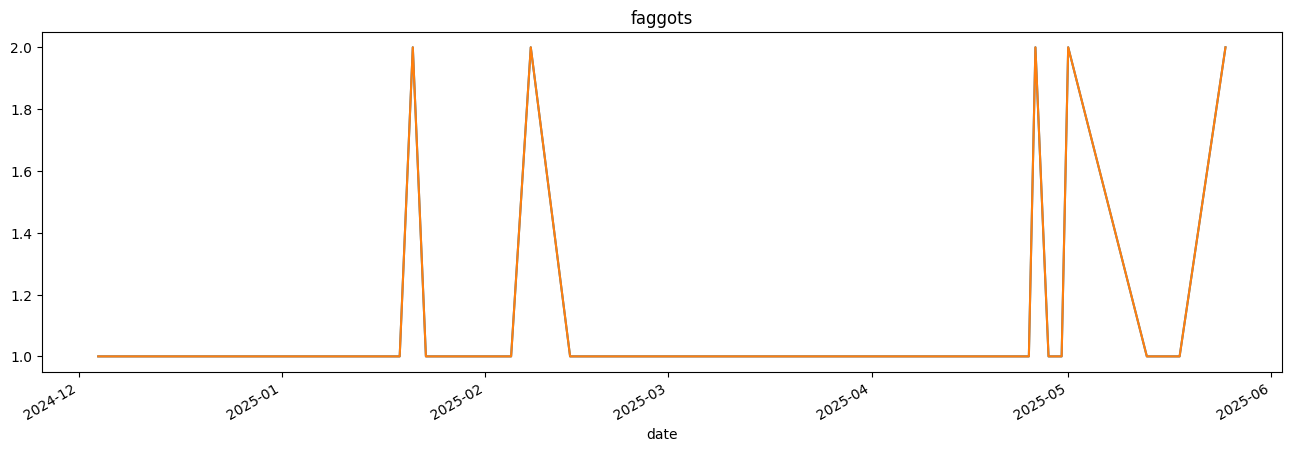

In [38]:
elasticsearch_count_executions.plot(figsize=(16,5))
elasticsearch_count_executions.plot(x='date', y='count')
plt.tight_layout
plt.title("faggots")
plt.show()

In [16]:
min(subsetElasticSearch['date'])
max(subsetElasticSearch['date'])

Timestamp('2025-05-25 00:00:00')

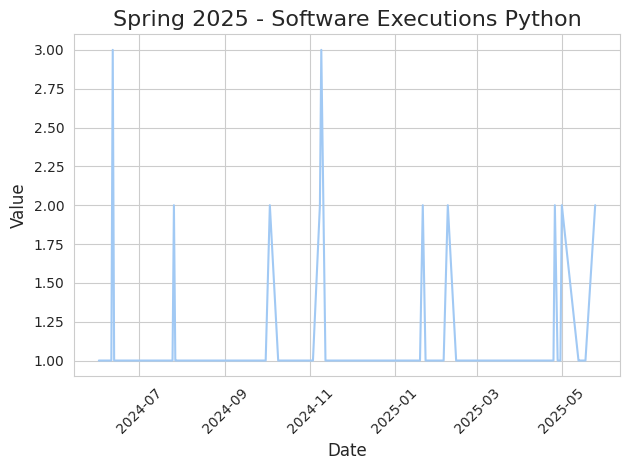

In [63]:
import seaborn as sns

elasticsearch_count_executions = subsetElasticSearch.groupby('date')['software'].count()

af = elasticsearch_count_executions.to_frame().reset_index()

af.columns = ["date", "count"]

sns.lineplot(data=af, x='date', y='count')
sns.set_style('whitegrid')
sns.set_palette('pastel')
plt.title("Spring 2025 - Software Executions Python", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust spacing to prevent label cutoff
plt.show()



